### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [12]:
import pandas as pd
df = pd.read_csv('vehicle.csv')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

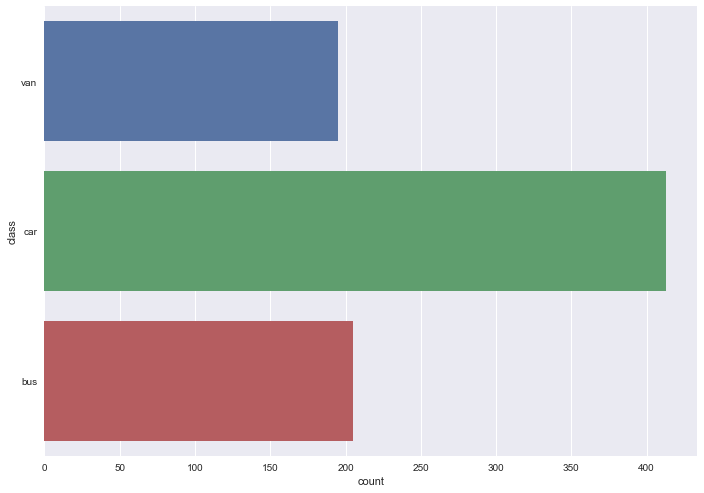

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y='class', data=df)

### Check for any missing values in the data 

In [13]:
print(df.isna().sum())
df = df.dropna()
print("After dropping the na values " )
print(df.isna().sum())

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64
After dropping the na values 
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0


### 3. Standardize the data 

In [98]:
data = df.drop("class", axis =1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [99]:
features = list(df.columns.values) 
print(features)
feature = features.remove('class')
feature

['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio', 'class']


['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2',
 'hollows_ratio']

In [100]:
data.columns = features
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [94]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [95]:
#Initial a list to track SSE for KMeans with different K
from sklearn.cluster import KMeans
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(2,15):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    
    #Fit on the data
    km.fit(data)
    
    #Add cluster information for each record in dataframe
    data['k_' + str(i)] = km.predict(data)
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]
    distortion.append(km.inertia_)

### 6. Plotting Elbow/ Scree Plot

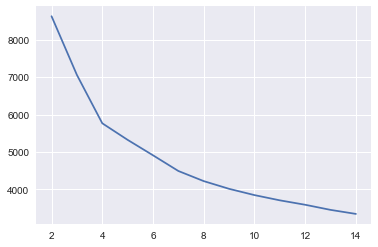

In [96]:
#import seaborn as sns
#sns.lineplot(x='K', y='SSE', data=sse_df)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sse_df['K'],pd.DataFrame(distortion),linestyle='-')

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [ ]:
## As the elbow is getting created at 4 we will go ahead and consider that as an optimal value

In [101]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(data)
data['k_4'] = km.predict(data)
print(km.cluster_centers_)

[[-1.99237839e-01 -6.14601238e-01 -3.11794725e-01 -2.06029683e-02
   1.74230689e-01 -1.77920849e-01 -4.54981184e-01  3.18874058e-01
  -4.84494186e-01 -5.77235931e-01 -4.21699830e-01 -4.56999534e-01
  -6.43849407e-01 -6.90192165e-01 -5.59921798e-02  5.29224371e-02
   9.12403838e-01  7.78541463e-01]
 [ 1.15442786e+00  1.18428647e+00  1.21198691e+00  9.73321772e-01
   9.49213388e-02  2.18659142e-01  1.29796844e+00 -1.21424667e+00
   1.30184458e+00  1.09830595e+00  1.20590258e+00  1.30898668e+00
   1.09121291e+00 -1.07878646e-01  1.68326262e-01  2.67954844e-01
   4.67043879e-03  1.90327006e-01]
 [-8.89995552e-01 -4.85647736e-01 -8.36377014e-01 -1.02229190e+00
  -4.94910025e-01 -2.84709502e-01 -7.54656228e-01  8.24833086e-01
  -7.25205511e-01 -4.49002525e-01 -7.69508547e-01 -7.61609875e-01
  -3.66373499e-01  7.15199887e-01 -9.48929498e-02 -3.14132413e-01
  -9.89670439e-01 -1.03185613e+00]
 [-7.33024343e-01  7.27349604e-02 -2.72170954e-01  2.94768327e+00
   6.83665190e+00  8.69670551e+00 -5.

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [111]:
centroid_df=pd.DataFrame(km.cluster_centers_)
centroid_df.columns = features
centroid_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.199238,-0.614601,-0.311795,-0.020603,0.174231,-0.177921,-0.454981,0.318874,-0.484494,-0.577236,-0.421700,-0.457000,-0.643849,-0.690192,-0.055992,0.052922,0.912404,0.778541
1,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
2,-0.889996,-0.485648,-0.836377,-1.022292,-0.494910,-0.284710,-0.754656,0.824833,-0.725206,-0.449003,-0.769509,-0.761610,-0.366373,0.715200,-0.094893,-0.314132,-0.989670,-1.031856
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [113]:
km.labels_

array([0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 1,
       2, 2, 1, 2, 3, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       2, 1, 2, 0, 3, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [134]:
import numpy as np 
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

             0          1
0    10.568754   1.009986
1     9.381139   2.462211
2    11.876920  -1.381940
3     7.363901   0.655679
4    10.071013  -1.326580
5    11.241905   0.601791
6    10.698405  -1.844732
7    10.499130   0.808073
8    11.437017   0.607759
9     9.441683   2.028276
10    8.250995  -2.489888
11    9.557439  -1.771297
12   13.943869   0.442366
13   13.141228   2.817170
14    9.047640   0.445082
15    8.908055  -0.867799
16   14.606236   0.712613
17    7.286748   2.027538
18    9.486778  -4.193613
19    5.528532   0.053837
20    7.339837  -3.554127
21   11.140649   0.942483
22    6.392442  -3.190011
23   10.208680  -2.563730
24    9.198079  -0.685612
25    9.270324   0.782687
26   10.890440   0.163823
27   10.561681   0.159279
28    7.625540   0.399998
29    9.761697  -0.787307
..         ...        ...
220  10.250343  22.816868
221  12.655470  25.016956
222  10.346414  22.212840
223   8.060465  20.329821
224  11.597947  20.135228
225  10.472566  15.345550
226   9.8677

### 9. Combine all three arrays a,b,c into a dataframe

In [135]:
#new_df_array = np.concatenate((a,b,c),axis=0)
new_df = pd.DataFrame(np.concatenate((a,b,c),axis=0))
print(new_df)

             0          1
0    11.331062  -0.971735
1     9.076642  -2.101201
2     9.112878   0.474261
3     8.239035  -2.136969
4    13.459303  -2.227768
5     9.946916  -4.404040
6     9.329129   1.563828
7     8.785724   0.531724
8    10.513180  -1.471207
9    10.501822  -0.835393
10    7.999002  -2.335561
11   10.403000  -0.247669
12   11.175395   0.780813
13    9.680993  -1.778359
14   13.324416   4.881701
15   11.717658   0.866230
16    9.153897  -0.945250
17    7.490508   0.002969
18   10.459880   2.860317
19   11.058191   2.457958
20    8.903414   0.544017
21   11.491488   3.749271
22   11.009295   0.310393
23   11.074792   3.280120
24   11.027576   0.043700
25    8.461413  -0.523843
26   10.969857   0.101379
27   10.121882  -1.147429
28    9.855700  -2.608047
29    8.341934   2.245189
..         ...        ...
220   8.639822  18.471194
221   7.697811  18.307249
222   9.061123  19.225624
223   9.610116  20.454756
224   9.916979  18.389519
225   9.570314  21.008374
226  11.5561

### 10. Use scatter matrix to print all the 3 distributions

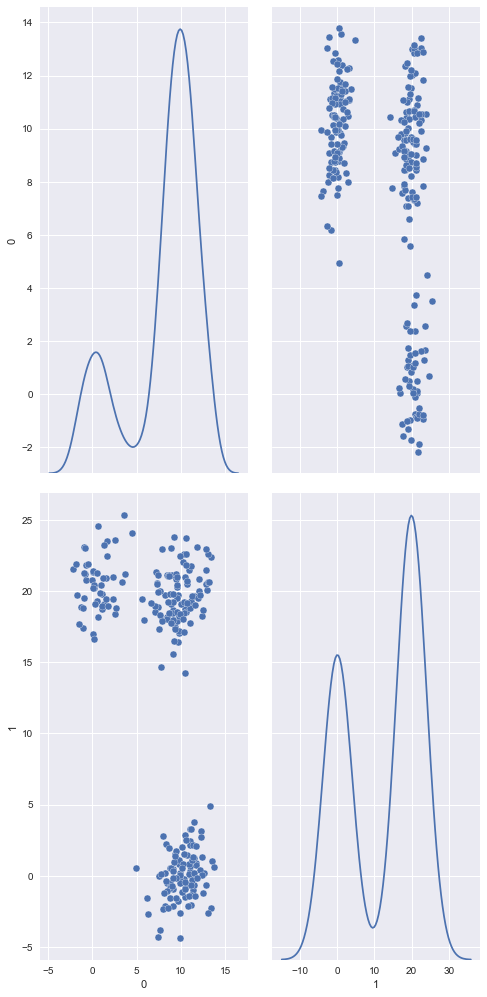

In [136]:

sns.pairplot(new_df, size=7,aspect=0.5 , diag_kind='kde')


### 11. Find out the linkage matrix

In [137]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from sklearn.cluster import AgglomerativeClustering
scaler=StandardScaler()
scaler.fit(new_df)
df=scaler.transform(new_df)
df=pd.DataFrame(df)
#dfn.columns=colNames
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
model.fit(df)
z=linkage(df,'ward')
c, coph_dists = cophenet(z , pdist(df))
print(c)

0.8628125912756961


Use ward as linkage metric and distance as Eucledian

### 12. Plot the dendrogram for the consolidated dataframe

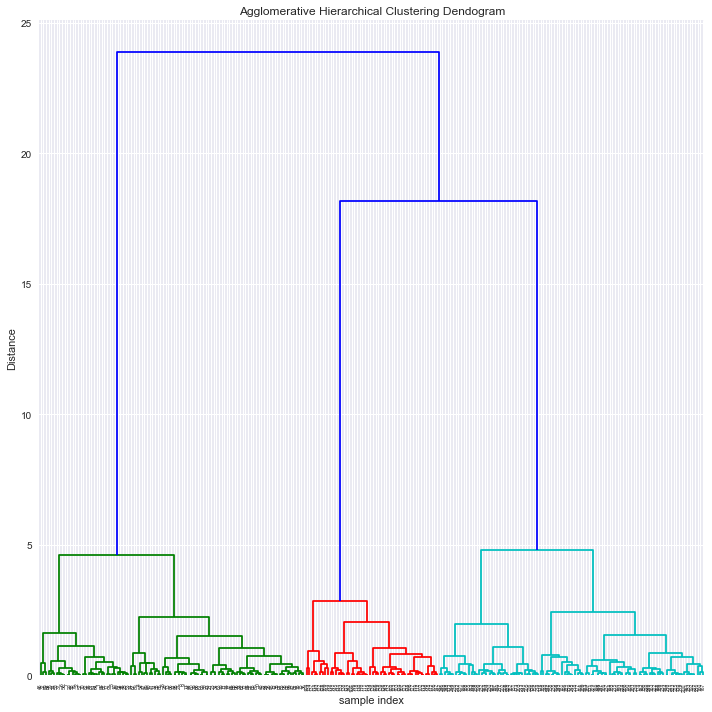

In [138]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

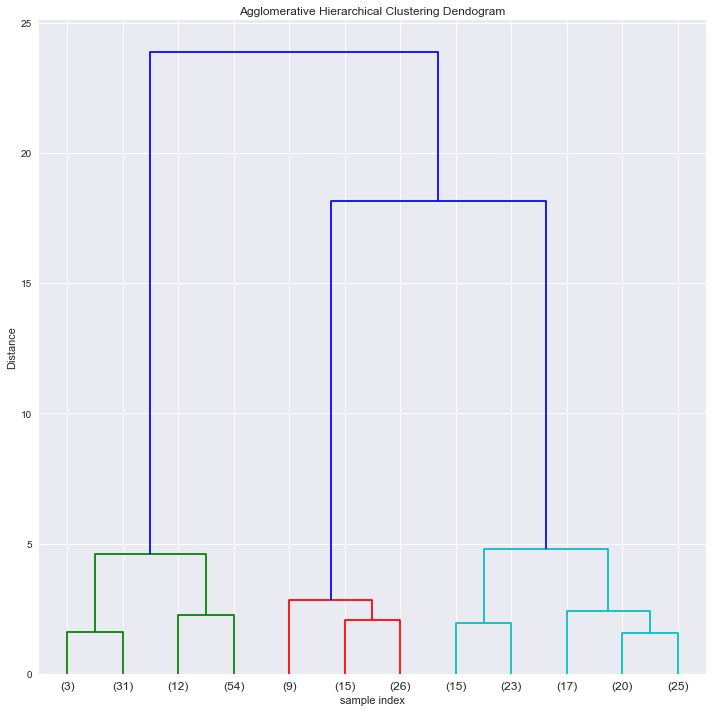

In [139]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z,p=12,truncate_mode='lastp')
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [ ]:
The distance is 15 and anything above that will give me 5 clusters

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 